
### 목표
- iris 데이터 활용해서 붓꽃 품종을 분류해보자
- 신경망에서 다중분류 학습하는 신경망을 설계해보자

In [44]:
# 도구
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [45]:
# 데이터 담기
data = load_iris()
# 번체 객체
# 키 : 값
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [46]:
data.feature_names  # 특성 4개 활용

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
data.data  # 데이터 타입 : float

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
data.target  # 이렇게 가지런하면 안되니까 랜덤 샘플링할 필요가 있다고 인식

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
data.target_names # 붓꽃 품종의 이름 0 => setosa ... => class : 3

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 훈련, 테스트 데이터 분리

In [50]:
# 8:2
# 고정은 숫자 3
from sklearn.model_selection import train_test_split
X = data.data
y = data.target
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=3)


print('훈련', X_train.shape)
print('훈련', y_train.shape)
print('test', X_test.shape) 
print('test', y_test.shape)

훈련 (120, 4)
훈련 (120,)
test (30, 4)
test (30,)


### 답 데이터 원핫 인코딩

In [51]:
# pandas 원핫 인코딩 함수 => pd.get_dummies()
# keras 제공 원핫 인코딩 함수 => to_categorical
from tensorflow.keras.utils import to_categorical
y_tr_oh = to_categorical(y_train)  # 훈련용 인코딩
y_te_oh = to_categorical(y_test)  # 테스트용 인코딩

In [52]:
# 변환되었는지 확인
y_tr_oh

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

#### keras활용 인공 신경망 생성
- 1. 신경망 구조설계
- 2. 학습/평가 방법 설정
- 3. 학습 및 시각화
- 4. 모델 평가 및 예측

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [54]:
# 1. 신경망 뼈대구축
model = Sequential()

# 입력층 + 중간층1 설정
# 뉴런 16, input_dim = 입력되는 특성의 개수(열) 만큼, 활성화 = 'relu'
model.add(Dense(units=16 , input_dim = 4, activation = 'relu'))

# 중간층
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))

# 출력층
# 클래스의 개수만큼(3개였잖아) 그리고 출력층은 소프트맥스로 출력
model.add(Dense(units = 3,activation = 'softmax'))

# 모델 정보요약
model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                80        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
 dense_15 (Dense)            (None, 3)                 33        
                                                                 
Total params: 987
Trainable params: 987
Non-trainable params: 0
_________________________________________________________________


In [55]:
# 2. 학습/ 평가 방법 설정
# 다중분류 loss = 'categorical_crossentropy'
model.compile(loss = 'categorical_crossentropy', 
              optimizer  = 'adam',
              metrics = ['accuracy'])

In [56]:
# 3. 학습
# 200
# 원핫 인코딩 데이터 연결
h = model.fit(X_train,y_tr_oh,epochs = 200)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.2204 - accuracy: 0.3333
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1133 - accuracy: 0.3333
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0875 - accuracy: 0.3333
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0743 - accuracy: 0.3333
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0601 - accuracy: 0.3333
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0481 - accuracy: 0.3333
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0398 - accuracy: 0.3333
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0298 - accuracy: 0.3333
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0192 - accuracy: 0.3333
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0098 - accuracy: 0.3333
Epoch 11/200
4/4 [===========

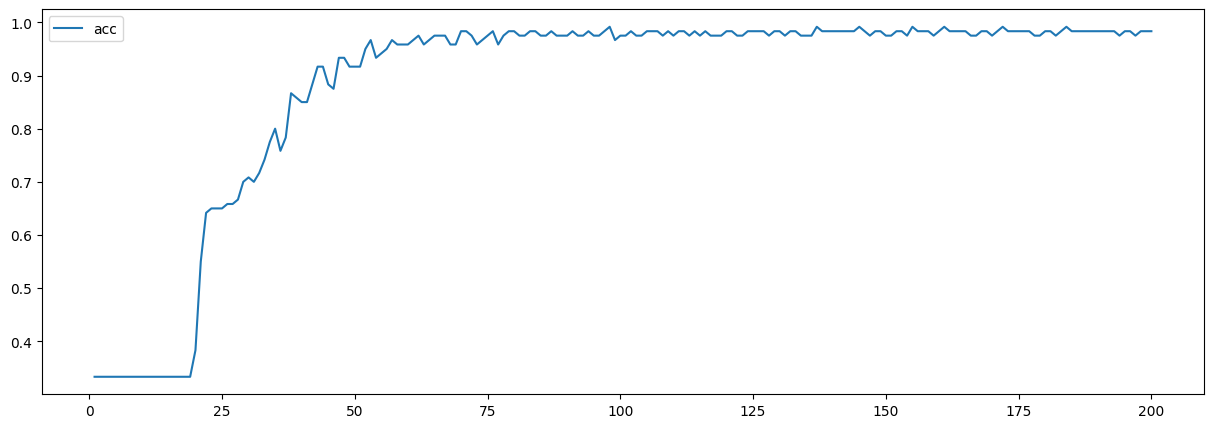

In [57]:
# 시각화
plt.figure(figsize = (15, 5))
plt.plot(range(1,201),
         h.history['accuracy'],label = 'acc')  # history 정확도 시각화
plt.legend() # 범례표시
plt.show()

In [59]:
# 평가(요약)
model.evaluate(X_test, y_te_oh)

1/1 [==============================] - 0s 444ms/step - loss: 0.0577 - accuracy: 0.9667


[0.05771929770708084, 0.9666666388511658]